# Objetivo do desafio
identificar o número de:
- Meteoros;
- Estrelas;
- Meteoros perpendiculares ao mar;

# Importanto bibliotecas
- cv2 para leitura da imagem;
- numpy para conseguirmos tratar dos dados com mais facilidade;
- matplotlib para plotarmos a imagem;

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


### Leitura da imagem

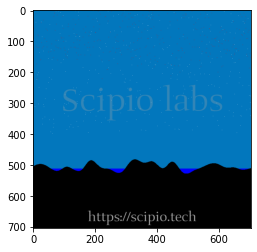

In [30]:
image = cv2.imread('meteor_challenge_01.png')
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)

### Transformando nossa imagem em um numpy array
Ao invés de tratarmos os pixeis da imagem em um array tradicional, usaremos o numpy array por sua velocidade de processamento e consumo de memória.

In [31]:

np_image = np.array(imageRGB)
lines, columns, colors = np_image.shape
print(np_image.shape)

(704, 704, 3)


Tendo em mãos não só nossa matriz de valores, sendo cada valor a representação do valor RGB de um dos pixeis da nossa imagem, falta pouco para podermos calcular os objetivos solicitados.

### Guardando valores
Para guardar os valores de estrelas, meteoros e meteoros perpendiculares iremos utilizar a estrutura de dicionário do Python.

In [32]:
tasks = {
    'stars': 0,
    'meteors': 0,
    'perpendicular_meteors': 0
}

# Contagem de Estrelas, Meteoros e Meteoros perpendiculares
Iremos utilziar nosso numpy array np_image para realizar a contagens solicitadas. Para isso, iremos primeiro fazer um loop em cada uma das colunas do np_image. Colocaremos como condição de parada encontrar um pixel preto ou azul, que simbolizam o horizonte e o mar respectivamente, tendo em vista que não iremos encontrar mais meteoros nem estrelas depois disso.

### Contagem de estrelas
Sempre que encontrarmos um pixel branco, iremos adcionar 1 ao valor guardado pela chave 'stars' no nosso dicionário tasks.

### Contagem de meteoros e meteoros perpendiculares
Diferente de quando encontrarmos um pixel branco, não iremos incrementar os valores do nosso dicionário diretamente. Nesse caso iremos utilizar uma variável auxiliar dentro do escopo de cada uma das interações, pois caso encontremos um pixel azul representando o mar, precisaremos ter os valores de meteoros guardados para adicionar no nosso dicionário os meteoros perpendiculares.

# Execução
Para conseguirmos comparar os valores do nosso numpy array, precisaremos criar outros numpy_array para cada um dos valores de pixel que queremos (pure white, pure red, pure blue e pure black).

In [33]:
star = np.array([ 255, 255, 255 ])
meteor = np.array([ 255, 0, 0 ])
ocean = np.array([ 0, 0, 255 ])
horizon = np.array([0, 0, 0])

In [34]:
for j in range(columns):
    num_meteors = 0
    column = np_image[:, j]
    for i in range(lines):
        if np.array_equal(column[i], star):
            tasks['stars'] += 1
        elif np.array_equal(column[i], meteor):
            num_meteors += 1
        elif np.array_equal(column[i], ocean):
            tasks['meteors'] += num_meteors
            tasks['perpendicular_meteors'] += num_meteors
            break
        elif np.array_equal(column[i], horizon):
            tasks['meteors'] += num_meteors
            break
    

In [35]:
print(tasks)

{'stars': 315, 'meteors': 328, 'perpendicular_meteors': 105}


# Conclusão
Temos um total 315 estrelas na imagem e 328 meteoros, os quais 105 estão caindo perpendicular ao oceano.

# Desafio Extra
Objetivo: Encontrar frase escondida nos pontos no céu.
Dicas:
- 177 caracteres;
- as tasks feitas nos desafios anteriores podem ser reutilizadas nesse.

### Reutilizando o que já foi feito
Como o desafio nos fala que podemos reutilizar o código usado antes, vamos fazer a contagem de pontos em cada coluna e ver aonde isso nos leva

In [36]:
dots_in_the_sky = []
for j in range(columns):
    #dots_in_the_sky.append([])
    number_of_dots = 0
    column = np_image[:, j]
    for i in range(lines):
        if np.array_equal(column[i], star) or np.array_equal(column[i], meteor):
            number_of_dots += 1
        elif np.array_equal(column[i], ocean) or  np.array_equal(column[i], horizon):
            break
    #dots_in_the_sky[j].append(number_of_dots)
    dots_in_the_sky.append(number_of_dots)
    np_dots_in_the_sky = np.array(dots_in_the_sky)


In [37]:

message = ""
for item in np_dots_in_the_sky:
    if item == 2:
        message += '-'
    elif item == 1:
        message += '.'
    else:
        message += ' '
print(message)
message.replace(" ", "")
print(message)


 .-.  -  -.....- --. . . .-. .-. --. ...  - ...  .- ...  -. -... --..-.. .-. ... .-    . -- .... --..-.- --. ..- --...    -      --.-  . -- ---- --- -.-  -      -- . .. --    - --...-  .-  .   .-. .   --..  - -- -.-- --. - -  -      -- .  . -- -... --. -    - ...  .- . .. -. .. - --. - . .-. ... .-.  .. .- .. . -- ...- --. .-  -- -..- --..-.. --. -..  -      -- ...  -- ---- --- .-. .-. ... -- .  . --.  .. --. ..  .-  ..   -      .-..  . .- --.- .-. . . ...  .  -- ..-- --   .- -- -.-. .-..  . .-  ... -.  ... --. . . .- ..   -- . .  -- -..- --. . .  - .... -..  .- --.-... -- .-   .-. ..  -- ...- --. ..- --. - . --. . . .-.  .  .- .. . -....-- --- -.  -- .  - -- --.  -- .-.. .- .... -- .--  -- .-.-
 .-.  -  -.....- --. . . .-. .-. --. ...  - ...  .- ...  -. -... --..-.. .-. ... .-    . -- .... --..-.- --. ..- --...    -      --.-  . -- ---- --- -.-  -      -- . .. --    - --...-  .-  .   .-. .   --..  - -- -.-- --. - -  -      -- .  . -- -... --. -    - ...  .- . .. -. .. - --. - . .-. ..